# Vehicle dataset from cardekho
This dataset contains information about used cars listed on www.cardekho.com  
Kaggle: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho

In [37]:
import numpy as np
import pandas as pd

In [38]:
DATASET_PATH = 'datasets/CAR_DETAILS_FROM_CAR_DEKHO.csv'
PREPARED_DATASET_PATH = 'datasets/CAR_DETAILS_FROM_CAR_DEKHO_prepared.csv'

##### Dataset's columns:  
1. name - Name of the cars
2. year - Year of the car when it was bought
3. selling_Price - Price at which the car is being sold
4. km_driven - Number of Kilometres the car is driven
6. fuel - Fuel type of car (petrol / diesel / CNG / LPG / electric)
7. seller_type - Tells if a Seller is Individual or a Dealer
8. transmission - Gear transmission of the car (Automatic/Manual)
9. owner - Number of previous owners of the car

Load dataset into dataframe

### Prepare the data

In [39]:
df = pd.read_csv(DATASET_PATH)

In [40]:
df.shape

(4340, 8)

In [41]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [42]:
df.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


Convert "fuel", "seller_type", "transmission" & "owner" to binary data

In [44]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [45]:
df_dummies = pd.get_dummies(df, columns=['fuel', 'seller_type', 'transmission', 'owner'])[:5]
df_dummies

,name,year,selling_price,km_driven,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti 800 AC,2007,60000,70000,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0


In [46]:
df_dummies.drop(['name', 'year', 'selling_price', 'km_driven'], axis='columns', inplace=True)
df_dummies

,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
1,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
2,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0
3,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
4,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0


In [47]:
df = pd.concat([df, df_dummies], axis=1)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,fuel_CNG,fuel_Diesel,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


Save the results

In [48]:
df.to_csv(PREPARED_DATASET_PATH, index=False, encoding='utf-8')

### Visualize the data

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [51]:
title_font = {
    "fontsize": 16,
    "fontweight": "bold",
    "color": "darkgrey",
    "family": "Arial",
}

lable_font = {
    "fontsize": 12,
    "color": "darkgrey",
    "family": "Arial",
}

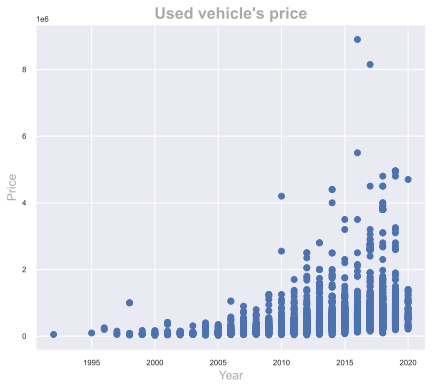

In [52]:
plt.figure(figsize=(7, 6))
plt.scatter(df['year'], df['selling_price'])

plt.title('Used vehicle\'s price', fontdict=title_font)
plt.xlabel('Year', fontdict=lable_font)
plt.ylabel('Price', fontdict=lable_font)

plt.show()

In [53]:
#sns.pairplot(df[['year', 'selling_price', 'km_driven']])

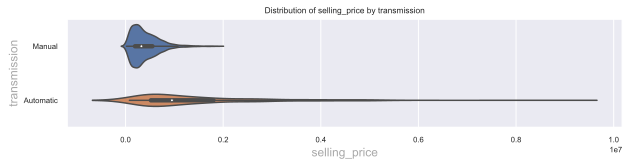

In [54]:
plt.figure(figsize=(10, 2))

sns.violinplot(df['selling_price'], df['transmission'])

plt.title('Distribution of selling_price by transmission')
plt.xlabel('selling_price', fontdict=lable_font)
plt.ylabel('transmission', fontdict=lable_font)

plt.show()

###  Drop outliers

In [59]:
df = df.loc[df['km_driven'] <= 40000]

In [60]:
df = df.loc[df['selling_price'] <= 400000]

In [61]:
df = df.loc[df['year'] >= 1995]

In [62]:
df.describe()

,year,selling_price,km_driven,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
count,525.000000,525.000000,525.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2013.851429,254390.815238,26778.396190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4.153636,96806.816457,10531.839843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1996.000000,20000.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2012.000000,200000.000000,20000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2015.000000,270000.000000,28942.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2017.000000,325000.000000,35000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2020.000000,400000.000000,40000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


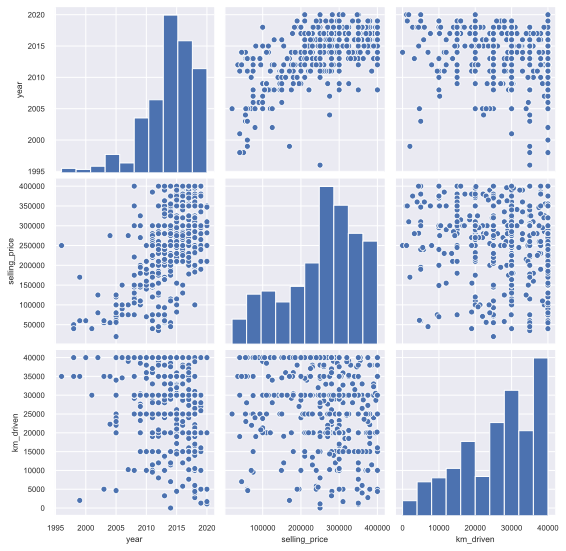

In [63]:
sns.pairplot(df[['year', 'selling_price', 'km_driven']])

In [64]:
df.to_csv(PREPARED_DATASET_PATH, index=False, encoding='utf-8')